In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [ ]:
avg_t = df.groupby(df["Day"].map(lambda x: x.year)).agg('mean')
print(avg_t["t"].index[avg_t["t"].argmin()])
print(avg_t["t"].index[avg_t["t"].argmax()])

2012
2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [ ]:
filtered = df.loc[(df["t"] >= 0) & (df["Day"].map(lambda x: x.month) == 1)]
counted = filtered.groupby(filtered["Day"].map(lambda x: x.year)).agg('count')
print(counted.index[counted["t"].argmax()])

2008


**3.** В каком году было самое холодное лето (по средней температуре)

In [ ]:
filtered = df.loc[(df["Day"].map(lambda x: x.month) <= 8) & (df["Day"].map(lambda x: x.month) >= 6)]
avg_t_summer = filtered.groupby(filtered["Day"].map(lambda x: x.year)).agg('mean')
print(avg_t_summer["t"].index[avg_t_summer["t"].argmin()])

2008


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [ ]:
df_ = df
df_['$\Delta$ t'] = (df["t"] - df_["t"].shift(-1)).abs()
print(df_.loc[df_['$\Delta$ t'].argmax()]["Day"])


2014-05-26 00:00:00


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

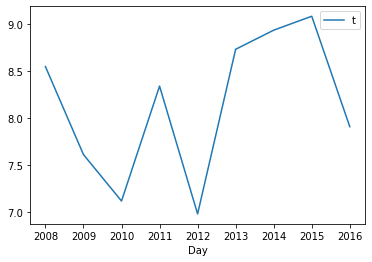

In [ ]:
%matplotlib inline

avg_t.plot()